# Day 5 — California Housing Price Prediction  
**This notebook covers:**
- Full EDA  
- Data preprocessing  
- Linear Regression model  
- Residual analysis  
- Evaluation metrics  
- Cross-validation

## Imports

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Explanation:**
We import everything needed: dataset, train/test split, scaling, model, cross-validation, and plotting libraries.

## Load and prepare the dataset

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["MedHouseValue"] = data.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Explanation:**
We load the dataset, convert it to a DataFrame, add the target column, and preview the first few rows.

## Basic dataset info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

**Explanation:**
Check data types, summary statistics, and missing values.

## Correlation heatmap

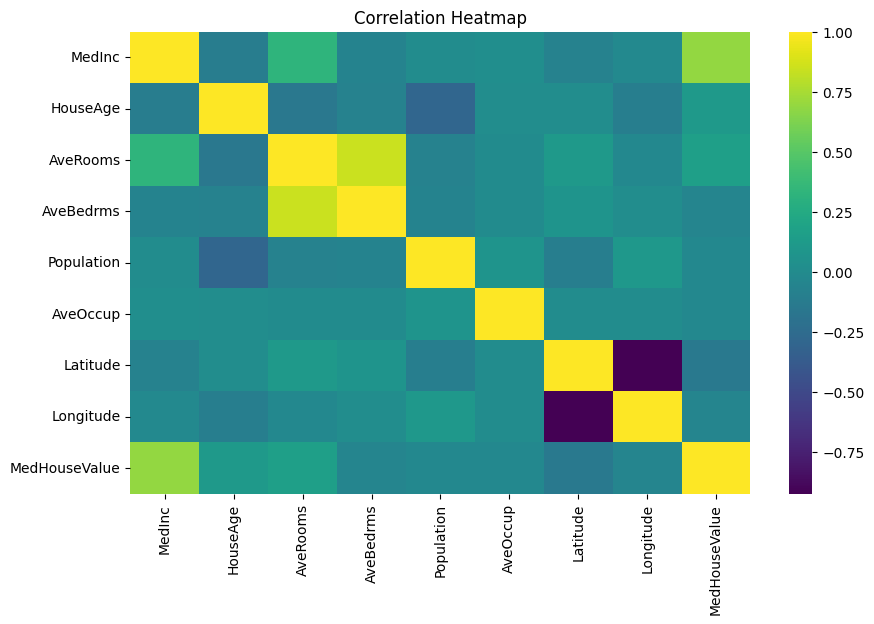

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='viridis')
plt.title("Correlation Heatmap")
plt.show()

**Explanation:**
Shows which features relate strongly to house price.
MedInc usually has the highest correlation.

## Example scatter plot

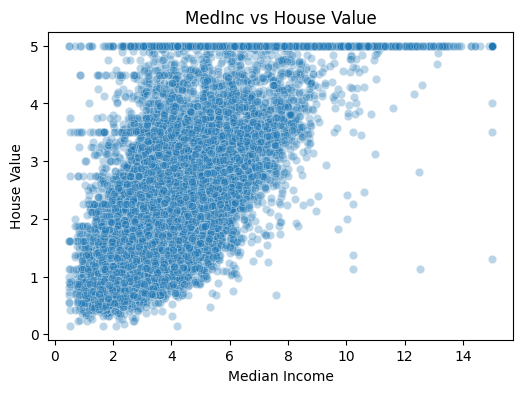

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["MedInc"], y=df["MedHouseValue"], alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("House Value")
plt.title("MedInc vs House Value")
plt.show()

**Explanation:**
A simple scatter plot shows how income affects price.

## Train-Test Split

In [11]:
X = df.drop("MedHouseValue", axis=1)
y = df["MedHouseValue"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Explanation: We split into training and testing sets (80–20 split) to evaluate on unseen data.

## Pipeline (Scaling + Model)

In [12]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

pipe

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


**Explanation:**
A pipeline ensures scaling happens correctly inside cross-validation and training.

## Train the Model

In [14]:
pipe.fit(X_train, y_train)
#Explanation: Fit the scaler + linear regression using training data only.

,steps,"[('scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


## Predictions

In [15]:
y_pred = pipe.predict(X_test)
y_pred[:10]
#Show first few predictions from the model.

array([0.71912284, 1.76401657, 2.70965883, 2.83892593, 2.60465725,
       2.01175367, 2.64550005, 2.16875532, 2.74074644, 3.91561473])

## Evaluation Metrics

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 0.5332001304956565
RMSE: 0.7455813830127764
R2: 0.5757877060324508


**Explanation:**
We evaluate accuracy using MAE, RMSE, and R² score.

## Residual Plot

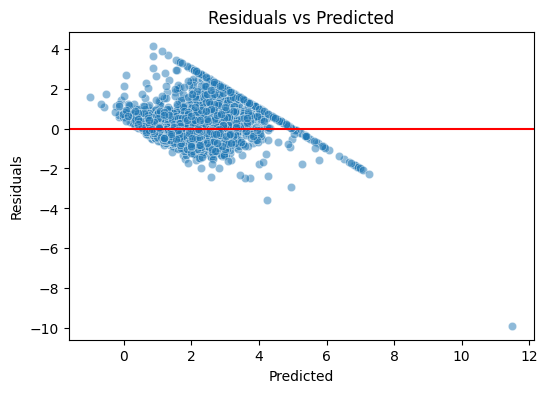

In [17]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color="red")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()

**Explanation:**
Residuals should look randomly scattered.
Patterns indicate model issues.

## Cross Validation

In [18]:
cv_scores = cross_val_score(pipe, X, y, cv=5, scoring='r2')
cv_scores, cv_scores.mean()

(array([0.54866323, 0.46820691, 0.55078434, 0.53698703, 0.66051406]),
 np.float64(0.5530311140279565))

**Explanation:**
Cross-validation gives a more stable estimate of model performance than a single train-test split.